In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
%pip install seaborn
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [7]:
df_DE_usa = df[(df['job_country'] == 'United States') &  (df['job_title_short'] == 'Data Engineer')].copy()
df_DE_usa = df_DE_USA.dropna(subset = ['salary_year_avg'])
df_DE_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
307,Data Engineer,Data Engineer,"Austin, TX",via LinkedIn,Full-time,False,"New York, United States",2023-10-03 13:05:31,False,False,United States,year,185000.0,NaN,hackajob,"[nosql, sql]","{'programming': ['nosql', 'sql']}"
339,Data Engineer,Global Market Leading Energy Firm - Staff Data...,United States,via LinkedIn,Full-time,False,"California, United States",2023-09-22 13:07:57,False,False,United States,year,195000.0,NaN,Xcede,None,None
380,Data Engineer,Snaplogic Data Engineer,"Durham, NC",via LinkedIn,Full-time,False,"Illinois, United States",2023-08-16 13:26:21,True,False,United States,year,97500.0,NaN,KTek Resourcing,"[sql, python]","{'programming': ['sql', 'python']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783111,Data Engineer,Data Engineer / DBA - TS/SCI w/ Poly,"Bethesda, MD",via Ladders,Full-time,False,Georgia,2023-07-08 06:44:50,False,False,United States,year,125000.0,NaN,CACI International,"[sql, postgresql, aws, aurora, sap]","{'analyst_tools': ['sap'], 'cloud': ['aws', 'a..."
784102,Data Engineer,Data Engineer III- Data Engineering,"Melbourne, FL",via Ladders,Full-time,False,Georgia,2023-01-09 06:51:17,False,False,United States,year,90000.0,NaN,Health First,"[sql, r, python, c#, java, db2, oracle, azure]","{'cloud': ['oracle', 'azure'], 'databases': ['..."
784191,Data Engineer,Data Engineer (Hybrid),United States,via Ai-Jobs.net,Full-time,False,"Florida, United States",2023-04-21 06:06:25,False,True,United States,year,217500.0,NaN,Captivation Software,"[python, java, elasticsearch, aws, kafka, exce...","{'analyst_tools': ['excel'], 'cloud': ['aws'],..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."


In [8]:
df_DE_usa['salary_year_avg']

92        120000.0
146       129500.0
307       185000.0
339       195000.0
380        97500.0
            ...   
783111    125000.0
784102     90000.0
784191    217500.0
785624    139216.0
785641    150000.0
Name: salary_year_avg, Length: 2915, dtype: float64

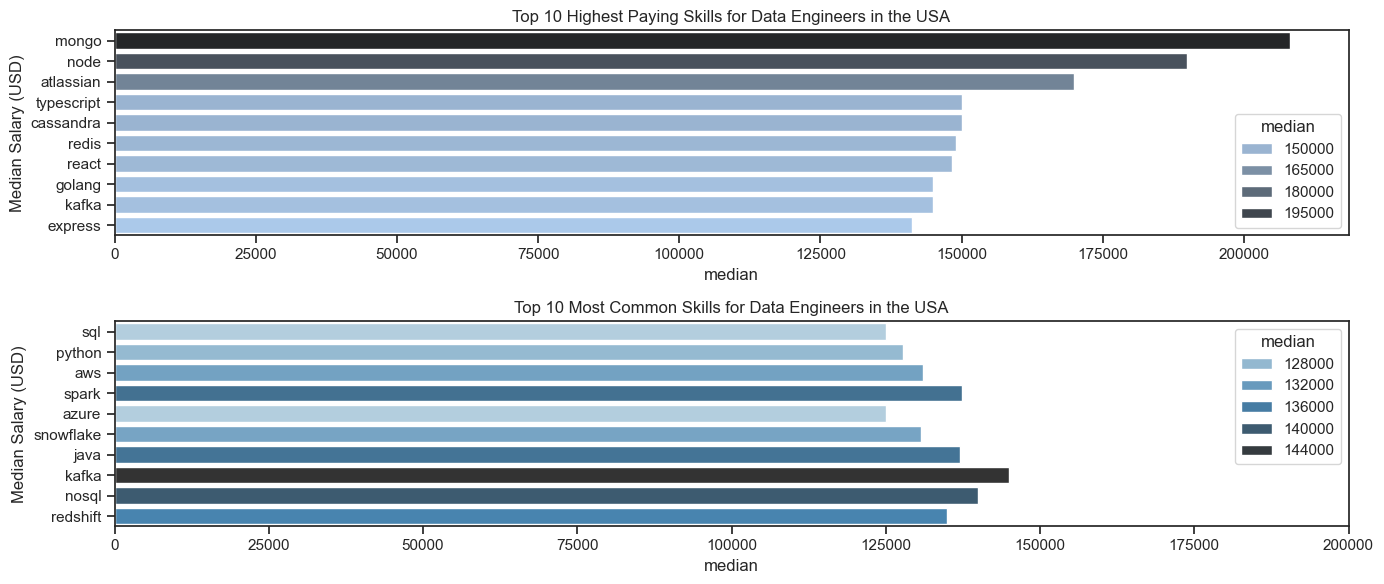

In [21]:
df_DE_usa = df_DE_usa.explode('job_skills')
df_DE_usa
df_USA_group = df_DE_usa.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_USA_highestPay = df_USA_group[df_USA_group['count'] >= 10].sort_values(by='median', ascending=False).head(10)
df_USA_highestPay

sns.set_theme(style="ticks", palette="pastel")

df_USA_skills = df_USA_group.sort_values(by='count', ascending=False).head(10)
df_USA_skills

fig, ax = plt.subplots(2, 1, figsize=(14, 6))

sns.barplot(data = df_USA_highestPay, x = 'median', y = df_USA_highestPay.index, ax = ax[0], palette = 'dark:b_r', hue = 'median')
# df_USA_highestPay[::-1].plot(kind='barh', y='median', ax=ax[0], color='skyblue', legend=False)
ax[0].set_title('Top 10 Highest Paying Skills for Data Engineers in the USA')
ax[0].set_ylabel('Median Salary (USD)')
# ax[0].tick_params(axis='x', rotation=45)



sns.barplot(data = df_USA_skills, x = 'median', y = df_USA_skills.index, ax = ax[1], palette = 'Blues_d', hue = 'median')
# df_USA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], color='lightgreen', legend=False)
ax[1].set_title('Top 10 Most Common Skills for Data Engineers in the USA')
ax[1].set_ylabel('Median Salary (USD)')
ax[1].set_xlim(0, 200000)
# ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Histogram of Average Yearly Salary for Data Engineers in USA')

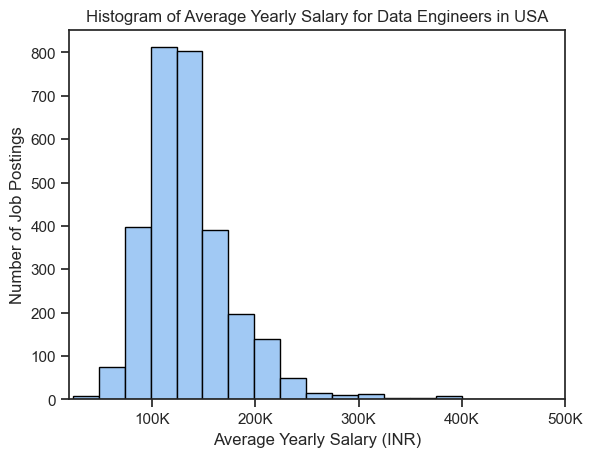

In [25]:
df_DE_USA['salary_year_avg'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlim(20000, 500000)


ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))



plt.ylabel('Number of Job Postings')    
plt.xlabel('Average Yearly Salary (INR)')
plt.title('Histogram of Average Yearly Salary for Data Engineers in USA')

Text(0.5, 1.0, 'Histogram of Average Yearly Salary for Data Engineers in India')

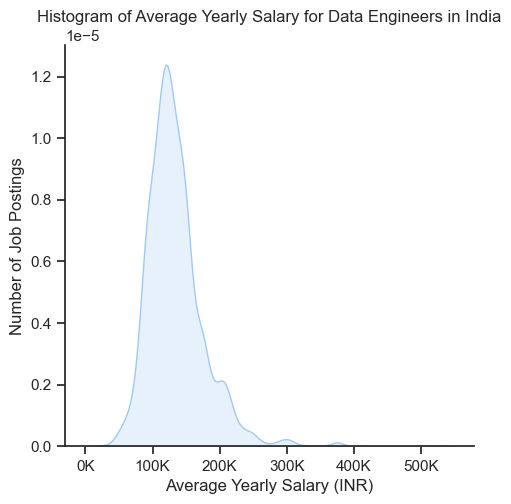

In [29]:
sns.displot(df_DE_USA['salary_year_avg'], fill = True, kind = 'kde')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))



plt.ylabel('Number of Job Postings')    
plt.xlabel('Average Yearly Salary (INR)')
plt.title('Histogram of Average Yearly Salary for Data Engineers in India')